`Дисциплина: Методы и технологии машинного обучения`   
`Уровень подготовки: бакалавриат`   
`Направление подготовки: 01.03.02 Прикладная математика и информатика`   
`Семестр: весна 2022/2023`   




# Исследование факторов и организация работы с таблицами данных

### Работу выполнила Бобина Татьяна Сергеевна

*Данные*: Статистика о государственных закупках лекарственных препаратов в 2021 
году согласно Единой информационной системе в сфере закупок.

In [230]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis

Скачиваем набор данных и проверяем корректность загрузки

In [30]:
data = pd.read_excel(r'C:\Users\4793788\OneDrive\Рабочий стол\tanyushka11\data_purch.xlsx')

In [231]:
data

,first_pub_date,final_protocol_pub_date,purchase_number,collecting_start_date,collecting_end_date,placing_base_name,cust_reg,lot_price_correct,drug_mnn_ext_code,drug_mnn_name,...,drug_position_price,ftg,is_abnd,is_znvlp,is_narcotic,is_msp_purchase,is_povt,is_dif,app_amount_absolute_correct,advance_sum_correct
0,2021-03-30,2021-04-12,AA0000001,2021-03-30,2021-04-07,Электронный аукцион,Республика Адыгея,56040.00,5d6d137c-75b7-11ea-b5ac-1b70cb6e9621,ИНТЕРФЕРОН АЛЬФА-2B,...,56040.00,Иммуномодуляторы,0,1,0,0,0,0,0.0,0.0
1,2021-03-30,2021-04-12,AB0000002,2021-03-30,2021-04-07,Электронный аукцион,Республика Адыгея,57720.00,5d6e26f4-75b7-11ea-b5ac-3b4e2912a2c3,ИНТЕРФЕРОН АЛЬФА-2B,...,57720.00,Иммуномодуляторы,0,1,0,0,0,0,0.0,0.0
2,2021-05-24,2021-06-08,AD0000003,2021-05-24,2021-06-01,Электронный аукцион,Республика Адыгея,931426.86,1edb1f40-bf5b-11e9-bd5d-c33c05f32457,БУДЕСОНИД,...,33096.00,Препараты для лечения обструктивных заболевани...,0,1,0,0,0,0,0.0,0.0
3,2021-05-24,2021-06-08,AD0000003,2021-05-24,2021-06-01,Электронный аукцион,Республика Адыгея,931426.86,1edb3a20-bf5b-11e9-bd5d-07a90f4fd9f6,БУДЕСОНИД+ФОРМОТЕРОЛ,...,225828.00,Препараты для лечения обструктивных заболевани...,0,1,0,0,0,0,0.0,0.0
4,2021-05-24,2021-06-08,AD0000003,2021-05-24,2021-06-01,Электронный аукцион,Республика Адыгея,931426.86,1edb168a-bf5b-11e9-bd5d-5725ca76550a,МОКСОНИДИН,...,10123.68,Препараты гипотензивные,0,1,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556307,2021-07-27,2021-08-06,AB0166842,2021-07-27,2021-08-04,Электронный аукцион,Город Байконур,221775.00,1ed99ddc-bf5b-11e9-bd5d-d70987c26fdc,ЖЕЛЕЗА [III] ГИДРОКСИД САХАРОЗНЫЙ КОМПЛЕКС,...,221775.00,Препараты антианемические,0,1,0,0,0,0,0.0,0.0
556308,2021-07-27,2021-08-05,AD0166843,2021-07-27,2021-08-04,Электронный аукцион,Город Байконур,27163.50,1ee4a07e-bf5b-11e9-bd5d-f377aa802c38,МЕТИОНИЛ-ГЛУТАМИЛ-ГИСТИДИЛ-ФЕНИЛАЛАНИЛ-ПРОЛИЛ-...,...,27163.50,Психоаналептики,1,1,0,0,1,0,0.0,0.0
556309,2021-07-27,2021-08-05,AX0166844,2021-07-27,2021-08-04,Электронный аукцион,Город Байконур,81400.00,1edbbc5c-bf5b-11e9-bd5d-2357606213ac,ПИПЕКУРОНИЯ БРОМИД,...,81400.00,Миорелаксанты,1,1,0,0,1,0,0.0,0.0
556310,2021-07-27,2021-08-05,BZ0166845,2021-07-27,2021-08-04,Электронный аукцион,Город Байконур,13475.00,1edc2494-bf5b-11e9-bd5d-27d8cd2613fd,СУКСАМЕТОНИЯ ХЛОРИД,...,13475.00,Миорелаксанты,1,1,0,0,1,0,0.0,0.0


#### Описание данных
- first_pub_date – дата публикации процедуры
* final_protocol_pub_date – дата завершения процедуры
+ purchase_number – идентификатор процедуры
* collecting_start_date – дата начала сбора заявок от потенциальных поставщиков
* collecting_end_date – дата окончания сбора заявок от потенциальных поставщиков
* placing_base_name – форма проведения торгов (конкурс, аукцион и т.п.)
* cust_reg – регион заказчика процедуры
* lot_price_correct – максимально возможная, объявленная заказчиком, цена за все препараты в закупке
* drug_mnn_ext_code – идентификатор лекарственного препарата
* drug_mnn_name – наименование лекарственного препарата (их меньше, чем drug_mnn_ext_code)
* drug_qty – объем закупаемого лекарственного препарата
* drug_price – цена за единицу объема закупаемого лекарственного препарата
* drug_position_price – цена за всю позицию закупаемого лекарственного препарата
* ftg – класс закупаемого лекарственного препарата
* is_abnd – фиктивная переменная: 1 – закупка не состоялась, 0 – состоялась
* is_znvlp – фиктивная переменная: 1 – в закупке содержится хотя бы 1 препарат из списка ЖВЛП, 0 – не содержатся
* is_narcotic – фиктивная переменная: 1 – в закупке содержится хотя бы 1 препарат, в составе которого есть наркотические вещества, 0 – не содержатся
* is_msp_purchase – фиктивная переменная: 1 – закупка предназначена только для субъектов малого и среднего предпринимательства, 0 – не предназначена
* is_povt – фиктивная переменная: 1 – эту процедуру заказчик вынужден повторить, 0 – не повторная
* is_dif – фиктивная переменная: 1 – в закупке содержится хотя бы 1 препарат, являющийся дефицитным, 0 – не содержатся
* app_amount_absolute_correct – сумма залога
* advance_sum_correct – сумма аванса

In [232]:
# вывод типов данных
data.dtypes

first_pub_date                 datetime64[ns]
final_protocol_pub_date        datetime64[ns]
purchase_number                        object
collecting_start_date          datetime64[ns]
collecting_end_date            datetime64[ns]
placing_base_name                      object
cust_reg                               object
lot_price_correct                     float64
drug_mnn_ext_code                      object
drug_mnn_name                          object
drug_qty                              float64
drug_price                            float64
drug_position_price                   float64
ftg                                    object
is_abnd                                 int64
is_znvlp                                int64
is_narcotic                             int64
is_msp_purchase                         int64
is_povt                                 int64
is_dif                                  int64
app_amount_absolute_correct           float64
advance_sum_correct               

In [233]:
data.columns

Index(['first_pub_date', 'final_protocol_pub_date', 'purchase_number',
       'collecting_start_date', 'collecting_end_date', 'placing_base_name',
       'cust_reg', 'lot_price_correct', 'drug_mnn_ext_code', 'drug_mnn_name',
       'drug_qty', 'drug_price', 'drug_position_price', 'ftg', 'is_abnd',
       'is_znvlp', 'is_narcotic', 'is_msp_purchase', 'is_povt', 'is_dif',
       'app_amount_absolute_correct', 'advance_sum_correct'],
      dtype='object')

In [251]:
# проверим на пропуски
data.isnull().any()

first_pub_date                 False
final_protocol_pub_date        False
purchase_number                False
collecting_start_date          False
collecting_end_date            False
placing_base_name              False
cust_reg                       False
lot_price_correct              False
drug_mnn_ext_code              False
drug_mnn_name                  False
drug_qty                        True
drug_price                     False
drug_position_price             True
ftg                            False
is_abnd                        False
is_znvlp                       False
is_narcotic                    False
is_msp_purchase                False
is_povt                        False
is_dif                         False
app_amount_absolute_correct    False
advance_sum_correct            False
dtype: bool

##### Наибольшее  влияние на вероятность незакрытия закупки оказывают следующие факторы:
+ `placing_base_name` - разные формы проведения торгов могут иметь разную степень конкуренции 
+ `lot_price_correct` - чем ниже максимально возможная цена, объявленная заказчиком, тем меньше вероятность, что найдется поставщик, готовый выполнить заказ по данной цене.
+ `drug_qty` - может не быть в наличие нужный объем препарата
+ `drug_price` - не подходящая цена, может помешать слелать закупку
+ `drug_position_price` - аналогично
+ `is_narcotic` - содержание наркотических веществ, может повлечь незакрытие закупки
+ `is_dif` - закупка дефицитных препаратов может быть более сложной из-за доступности препаратов
###### Помимо представленных в наборе факторов, может повлиять на незакрытие закупки:

+ `product_quality` - 1-товар ненадлежащего качества, 0-качественный товар
+ `complaints` - 1-были жалобы на товар, 0-жалоб не было
+ `deliver_on_time` - 1-товар не смогут доставить в срок, 0-смогут доставить в срок товар

In [252]:
# сгруппируем данные по purchase_number
grouped_data = data.groupby('purchase_number').agg({
    'is_abnd': 'max',
    'placing_base_name': 'first',
    'lot_price_correct': 'first',
    'drug_qty': 'sum',
    'drug_price': 'sum',
    'drug_position_price': 'sum',
    'is_narcotic': 'first',
    'is_dif': 'first',
})

In [253]:
grouped_data

,is_abnd,placing_base_name,lot_price_correct,drug_qty,drug_price,drug_position_price,is_narcotic,is_dif
purchase_number,,,,,,,,
AA0000001,0,Электронный аукцион,56040.00,2000.0,28.0200,56040.00,0,0
AA0000006,0,Электронный аукцион,383087.00,5832558.0,44.8300,383087.00,0,0
AA0000011,1,Электронный аукцион,185868.25,53560.1,109.8900,185868.25,0,0
AA0000016,0,Электронный аукцион,162944.70,192980.0,120.4300,162944.70,0,0
AA0000021,0,Электронный аукцион,130772.34,6300.0,39.9012,130772.34,0,0
...,...,...,...,...,...,...,...,...
BZ0166825,0,Электронный аукцион,384000.00,560000.0,4.2000,384000.00,0,0
BZ0166830,0,Электронный аукцион,56835.00,13500.0,4.2100,56835.00,0,0
BZ0166835,1,Электронный аукцион,11880.00,3000.0,3.9600,11880.00,0,0


### Формирование факторов

Фактор `is_most_expensive` - фиктивная переменная: 1 - если drug_position_price выше 70-го процентиля всех значений в этом столбце, 0 - в противном случае. Он прказывает, является ли закупка дорогой.

##### Фактор, полученный с помощью метода главных компонент:
Фактор `new_feature` - это фактор, полученный с помощью метода главных компонент из исходных столбцов с информацией о покупках. Этот фактор является линейной комбинацией исходных факторов, которые наилучшим образом объясняют вариацию в данных.

##### Факторы, полученные с помощью простейших арифметических операций:

Фактор `amount_drug` - это фактор, который представляет количество препоратов в закупке. Вычисляется как отношение цены за всю позицию закупаемого лекарственного препарата к цена за единицу объема закупаемого лекарственного препарата.

In [254]:
# выводим уникальные значения
grouped_data['placing_base_name'].unique()

array(['Электронный аукцион', 'Запрос котировок в электронной форме',
       'Запрос предложений в электронной форме', 'Запрос котировок'],
      dtype=object)

In [255]:
# преобразуем категориальную переменную 
grouped_data = pd.get_dummies(grouped_data, columns=['placing_base_name'])

In [256]:
grouped_data

,is_abnd,lot_price_correct,drug_qty,drug_price,drug_position_price,is_narcotic,is_dif,placing_base_name_Запрос котировок,placing_base_name_Запрос котировок в электронной форме,placing_base_name_Запрос предложений в электронной форме,placing_base_name_Электронный аукцион
purchase_number,,,,,,,,,,,
AA0000001,0,56040.00,2000.0,28.0200,56040.00,0,0,0,0,0,1
AA0000006,0,383087.00,5832558.0,44.8300,383087.00,0,0,0,0,0,1
AA0000011,1,185868.25,53560.1,109.8900,185868.25,0,0,0,0,0,1
AA0000016,0,162944.70,192980.0,120.4300,162944.70,0,0,0,0,0,1
AA0000021,0,130772.34,6300.0,39.9012,130772.34,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
BZ0166825,0,384000.00,560000.0,4.2000,384000.00,0,0,0,0,0,1
BZ0166830,0,56835.00,13500.0,4.2100,56835.00,0,0,0,0,0,1
BZ0166835,1,11880.00,3000.0,3.9600,11880.00,0,0,0,0,0,1


In [257]:
new_column_names = {
    'placing_base_name_Электронный аукцион': 'placing_base_name_electronic_auction', 
    'placing_base_name_Запрос котировок в электронной форме': 'placing_base_name_request_quotations_electronic_form', 
    'placing_base_name_Запрос предложений в электронной форме': 'placing_base_name_request_propasals_electronic_form', 
    'placing_base_name_Запрос котировок': 'placing_base_name_request_quotations'
}

In [258]:
# изменим имена столбцов
grouped_data = grouped_data.rename(columns=new_column_names)

In [259]:
grouped_data

,is_abnd,lot_price_correct,drug_qty,drug_price,drug_position_price,is_narcotic,is_dif,placing_base_name_request_quotations,placing_base_name_request_quotations_electronic_form,placing_base_name_request_propasals_electronic_form,placing_base_name_electronic_auction
purchase_number,,,,,,,,,,,
AA0000001,0,56040.00,2000.0,28.0200,56040.00,0,0,0,0,0,1
AA0000006,0,383087.00,5832558.0,44.8300,383087.00,0,0,0,0,0,1
AA0000011,1,185868.25,53560.1,109.8900,185868.25,0,0,0,0,0,1
AA0000016,0,162944.70,192980.0,120.4300,162944.70,0,0,0,0,0,1
AA0000021,0,130772.34,6300.0,39.9012,130772.34,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
BZ0166825,0,384000.00,560000.0,4.2000,384000.00,0,0,0,0,0,1
BZ0166830,0,56835.00,13500.0,4.2100,56835.00,0,0,0,0,0,1
BZ0166835,1,11880.00,3000.0,3.9600,11880.00,0,0,0,0,0,1


In [260]:
grouped_data.dtypes

is_abnd                                                   int64
lot_price_correct                                       float64
drug_qty                                                float64
drug_price                                              float64
drug_position_price                                     float64
is_narcotic                                               int64
is_dif                                                    int64
placing_base_name_request_quotations                      uint8
placing_base_name_request_quotations_electronic_form      uint8
placing_base_name_request_propasals_electronic_form       uint8
placing_base_name_electronic_auction                      uint8
dtype: object

In [261]:
pca = PCA(n_components=1)
new_feature = pca.fit_transform(grouped_data)
grouped_data['new_feature'] = new_feature

In [262]:
# создаем новые факторы
grouped_data['amount_drug'] = grouped_data['drug_position_price'] / grouped_data['drug_price']
grouped_data['is_most_expensive'] = np.where(grouped_data['drug_position_price'] > grouped_data['drug_position_price'].quantile(0.7), 1, 0)

### Разделяем на обучающую и тестовую выборки

In [263]:
grouped_data.dropna(subset=['is_abnd'], inplace=True)
# Выделение случайной выборки размера n
n = 60000
sample = grouped_data.sample(n)

# Разделение выборки на обучающую и тестовую
test_size = 0.15 # 15% тестовая выборка
train, test = train_test_split(sample, test_size=test_size, random_state=42)

# Разделение выборки на признаки и целевую переменную
X_train, X_test = train.drop('is_abnd', axis=1), test.drop('is_abnd', axis=1)
y_train, y_test = train['is_abnd'], test['is_abnd']

In [264]:
# Количество объектов в обучающей выборке
X_train.shape[0]

51000

### Оценка важности выделенных факторов на основе метода "Случайного леса"

                                              feature  importance
3                                 drug_position_price    0.233034
2                                          drug_price    0.216986
0                                   lot_price_correct    0.158026
10                                        new_feature    0.155125
11                                        amount_drug    0.101421
1                                            drug_qty    0.100331
5                                              is_dif    0.016170
8   placing_base_name_request_propasals_electronic...    0.006968
4                                         is_narcotic    0.006522
9                placing_base_name_electronic_auction    0.003200


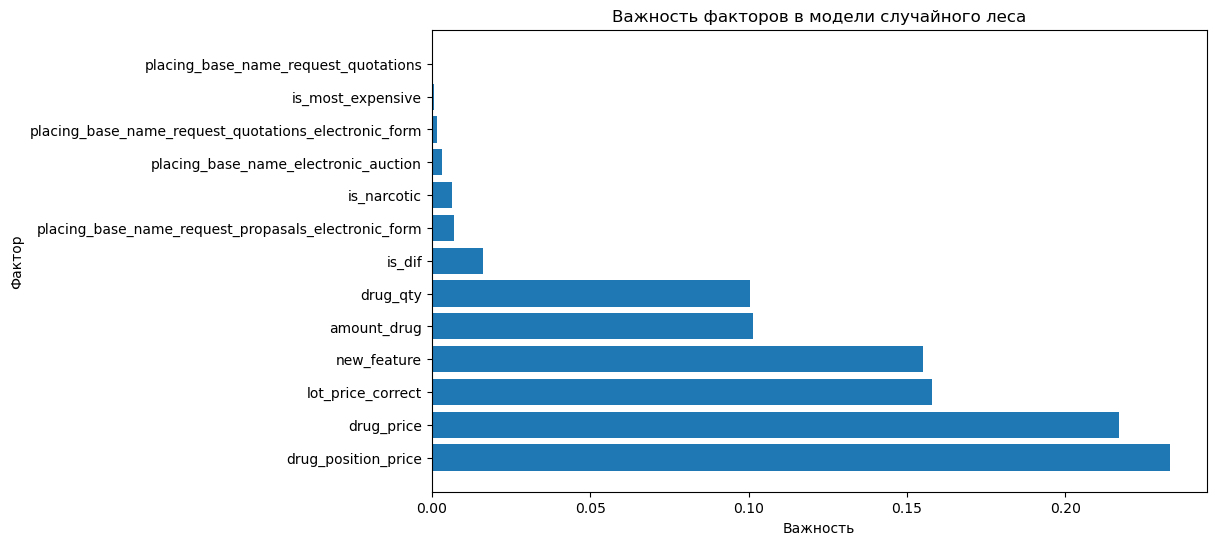

Наиболее важные факторы: ['drug_position_price', 'drug_price', 'lot_price_correct', 'new_feature', 'amount_drug']


In [265]:
#Создание модели случайного леса
rf = RandomForestRegressor(n_estimators=100, random_state=42)

#Обучение модели на обучающей выборке
rf.fit(X_train, y_train)

#Получение важности факторов
importances = rf.feature_importances_

#Сохранение важности факторов в датафрейм и сортировка по убыванию
df_importances = pd.DataFrame({'feature': X_train.columns, 'importance': importances}).sort_values('importance', ascending=False)

#Вывод 10 наиболее важных факторов
print(df_importances.head(10))

#Построение графика важности факторов
plt.figure(figsize=(10,6))
plt.barh(df_importances['feature'], df_importances['importance'])
plt.xlabel('Важность')
plt.ylabel('Фактор')
plt.title('Важность факторов в модели случайного леса')
plt.show()

#Вывод наиболее важных факторов
top_factors = df_importances.head(5)['feature'].values.tolist()
print(f"Наиболее важные факторы: {top_factors}")

### Построение модели логистической регрессии

In [267]:
#Создание модели логистической регрессии и обучение ее на обучающей выборке
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Предсказание на обучающей и тестовой выборках
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)

#Оценка точности на обучающей и тестовой выборках
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Точность модели на обучающей выборке: {train_accuracy:.4f}")
print(f"Точность модели на тестовой выборке: {test_accuracy:.4f}")

Точность модели на обучающей выборке: 0.5026
Точность модели на тестовой выборке: 0.5130


Точность модели на тестовой выборке не сильно отличается от точности на обучающей выборке.  Это равносильно случайному угадыванию. Таким образом, точность является не высокой и показывает, что модель не может надежно предсказывать целевую переменную.